In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_indices]
        self.components = eigenvectors[:, sorted_indices]

        # Select the top n_components
        self.components = self.components[:, :self.n_components]
        self.explained_variance = self.eigenvalues[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)


In [2]:
# example on iris dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

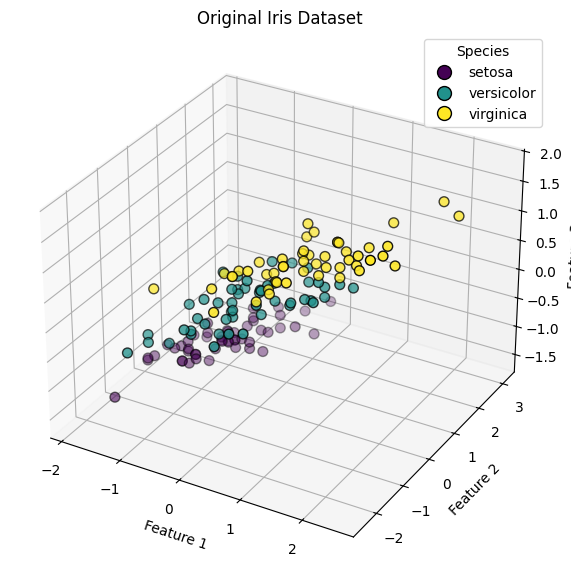

In [3]:
from matplotlib.lines import Line2D

# 3d plotting the original iris dataset with 3 features and 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Original Iris Dataset')

# Add legend for classes
class_labels = iris.target_names
handles = [Line2D([0], [0], marker='o', color='w', label=label,
                  markerfacecolor=plt.cm.viridis(i / 2), markersize=10, markeredgecolor='k')
           for i, label in enumerate(class_labels)]
ax.legend(handles=handles, title='Species', loc='upper right')

plt.show()



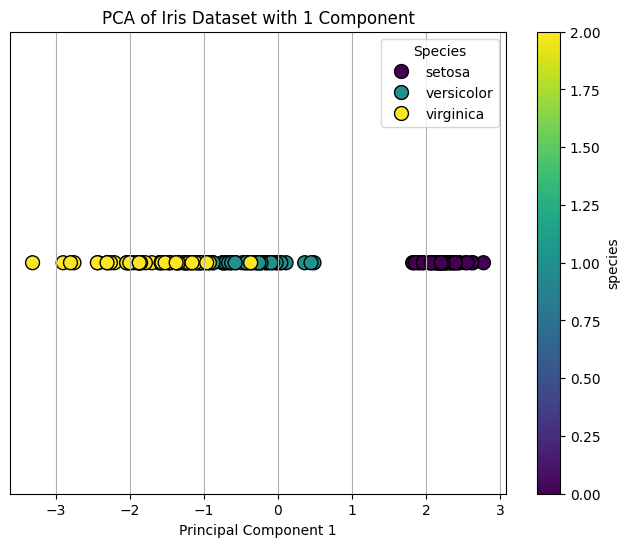

In [4]:
from matplotlib.lines import Line2D

# change of no of components
pca = PCA(n_components=1)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset with 1 Component')
plt.xlabel('Principal Component 1')
plt.yticks([])
plt.colorbar(label='species')
plt.grid()

# Add legend for classes
handles = [Line2D([0], [0], marker='o', color='w', label=label,
                  markerfacecolor=plt.cm.viridis(i / 2), markersize=10, markeredgecolor='k')
           for i, label in enumerate(class_labels)]
plt.legend(handles=handles, title='Species', loc='upper right')

plt.show()


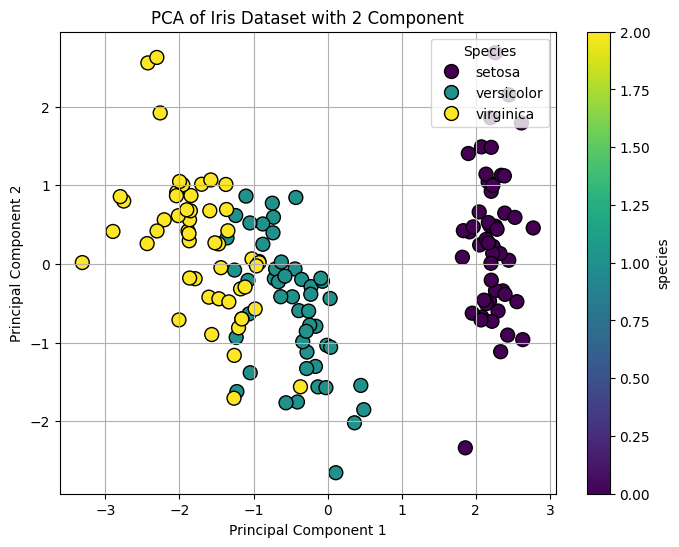

In [5]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset with 2 Component')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='species')
plt.grid()
handles = [Line2D([0], [0], marker='o', color='w', label=label,
                  markerfacecolor=plt.cm.viridis(i / 2), markersize=10, markeredgecolor='k')
           for i, label in enumerate(class_labels)]
plt.legend(handles=handles, title='Species', loc='upper right')
plt.show()


In [6]:
class Eigenfaces:
    def __init__(self, n_components=2):
        self.pca = PCA(n_components=n_components)

    def fit(self, X):
        self.pca.fit(X)

    def transform(self, X):
        return self.pca.transform(X)

    def plot_eigenfaces(self, eigenfaces, h, w):
        fig, axes = plt.subplots(1, len(eigenfaces), figsize=(15, 5))
        for i in range(len(eigenfaces)):
            axes[i].imshow(eigenfaces[i].reshape(h, w), cmap='gray')
            axes[i].axis('off')
        plt.show()

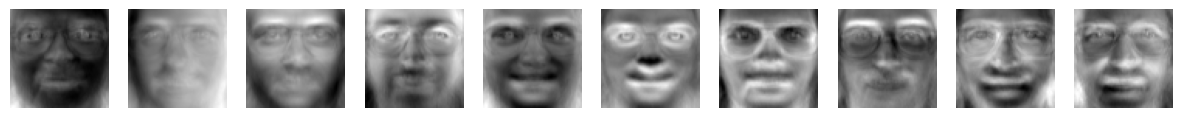

In [7]:
# Example usage on the Olivetti faces dataset
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
h, w = faces.images.shape[1:3]
eigenfaces = Eigenfaces(n_components=10)
eigenfaces.fit(X_faces)
X_eigenface = eigenfaces.transform(X_faces)
eigenfaces.plot_eigenfaces(eigenfaces.pca.components.T, h, w)

In [8]:
print(len(X_eigenface))

400


c:\Users\ADMIN\.conda\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\.conda\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\.conda\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         4
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       0.75      1.00      0.86         3
          15       1.00      0.50      0.67         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       0.00    

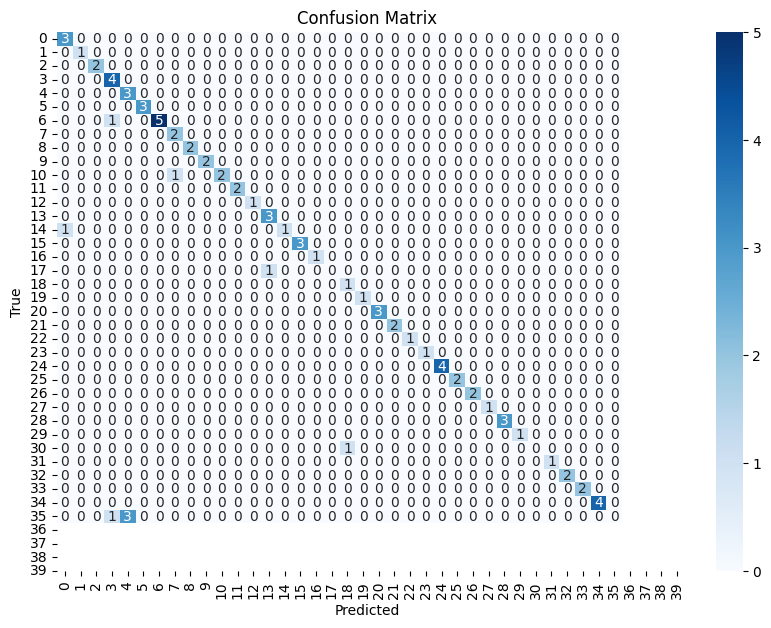

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# original dataset run
X_train, X_test, y_train, y_test = train_test_split(X_faces, y_faces, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Plotting the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(40), yticklabels=range(40))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


c:\Users\ADMIN\.conda\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\.conda\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\.conda\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\.conda

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.57      1.00      0.73         4
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       1.00      0.50      0.67         2
          13       0.50      1.00      0.67         1
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         0
          17       0.67      0.67      0.67         3
          18       1.00    

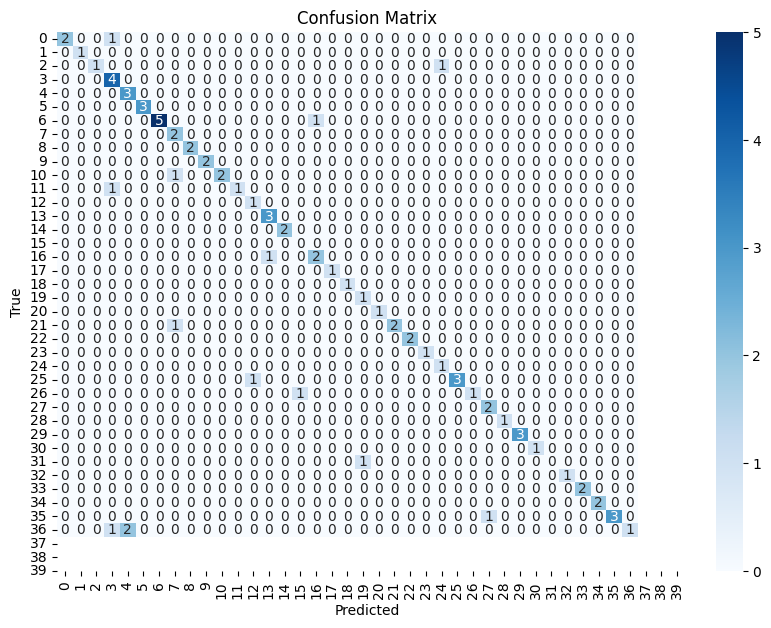

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_eigenface, y_faces, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Plotting the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(40), yticklabels=range(40))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()